<a href="https://colab.research.google.com/github/J-Pitts/J-Pitts.github.io/blob/master/Copy_of_08CrisisLTVCarPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

St. Loius Fed Data - Auto Loan Prices Vs Financing LTVs Around 2008 Collapse

        DTCTLVENANM  DTCTLVULNM
count     12.000000   12.000000
mean   25123.172500   98.255000
std      790.447174    3.139335
min    23623.280000   94.850000
25%    24822.280000   96.225000
50%    25153.840000   96.895000
75%    25512.262500  100.682500
max    26547.940000  104.650000
Correlation : -0.21


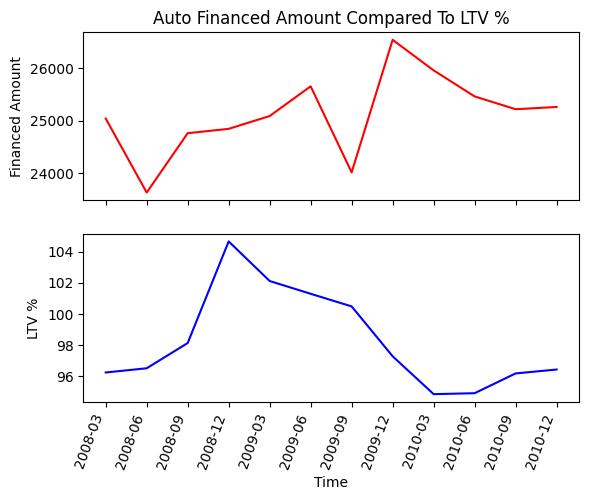

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

df1 = pd.read_csv("/content/drive/MyDrive/Portfolio Work Examples/Programming/DTCTLVULNM.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Portfolio Work Examples/Programming/DTCTLVENANM.csv")

#print(df1.shape)
#print(df1.describe())
#print(df1.head())

df2 = df2[df2['DTCTLVENANM'] != '.']

x = df2.merge(df1, on='DATE', how='left')

x = x.dropna()

#print(x.dtypes)

x['DATE'] = pd.to_datetime(x['DATE'])
x["DATE"] = x["DATE"].apply(lambda x: x.strftime('%Y-%m'))
x['DTCTLVENANM']= pd.to_numeric(x['DTCTLVENANM'])

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(x['DATE'],x['DTCTLVENANM'], color='red')
ax[1].plot(x['DATE'],x['DTCTLVULNM'], color='blue')

plt.setp(ax[1].get_xticklabels(), rotation=70, ha="right")

ax[0].set_title('Auto Financed Amount Compared To LTV %')
ax[0].set_ylabel('Financed Amount')
ax[1].set_ylabel('LTV %')

plt.xlabel('Time')

print(x.describe())

print('Correlation :',round(x['DTCTLVENANM'].corr(x['DTCTLVULNM']),2))
